In [30]:
!pip3 install gdown
!python3 -m spacy download en
!gdown 1u2pzjXIuhqf6CR2CBI6kqxLtiynLhUEE #gender_name_csv_file
!pip3 install spacytextblob langdetect

     |###############                 | 373.4 MB 182.6 MB/s eta 0:00:03s eta 0:03:21

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |#########################       | 629.4 MB 190.1 MB/s eta 0:00:01

     |##########################      | 639.0 MB 190.1 MB/s eta 0:00:01

     |##########################      | 648.5 MB 190.1 MB/s eta 0:00:01

     |###########################     | 657.3 MB 190.1 MB/s eta 0:00:01

     |###########################     | 666.6 MB 190.1 MB/s eta 0:00:01

     |###########################     | 676.0 MB 190.1 MB/s eta 0:00:01

     |############################    | 685.3 MB 190.1 MB/s eta 0:00:01

     |############################    | 694.7 MB 190.1 MB/s eta 0:00:01

     |############################    | 704.1 MB 155.2 MB/s eta 0:00:01

     |#############################   | 713.6 MB 155.2 MB/s eta 0:00:01

     |#############################   | 723.1 MB 155.2 MB/s eta 0:00:01

     |##############################  | 732.5 MB 155.2 MB/s eta 0:00:01

     |##############################  | 742.1 MB 155.2 MB/s eta 0:00:01

     |##############################  | 750.9 

     |############################### | 760.6 MB 155.2 MB/s eta 0:00:01

     |############################### | 770.1 MB 155.2 MB/s eta 0:00:01

     |############################### | 777.4 MB 155.2 MB/s eta 0:00:01

     |################################| 777.4 MB 6.4 kB/s 
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1u2pzjXIuhqf6CR2CBI6kqxLtiynLhUEE 



In [56]:
!pip3 install langid

     |################################| 1.9 MB 3.5 MB/s eta 0:00:01
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941187 sha256=580a448980559323da489a15b17f0923ab1fb380ca04e5f73b5f163d3d4491d0
  Stored in directory: /home/vkumar364/.cache/pip/wheels/93/95/a9/c292c9dd8cadb8f2359f1670ff198a40d47167b0be3236e1c8
Successfully built langid


In [1]:
import gzip
import json
import os
import pandas as pd
import langid

def load_data(file_name):
    count = 0
    data = []
    with gzip.open(file_name) as fin:
        for l in fin:
            d = json.loads(l)
            count += 1
            data.append(d)        
    return data

In [2]:
def download_and_join_data(ggid,csvname,gendered_df):
#     os.system('gdown '+ ggid)
    data = load_data(csvname)
    df = pd.DataFrame(data)
    final = pd.merge(df, gendered_data, on='user_id', how='left')
    return final[['user_id', 'rating', 'review_text', 'n_votes','n_comments','gender']]

In [3]:
gendered_data = pd.read_csv('goodreads_id_name_gender_new.csv')
gendered_data = gendered_data.drop(columns=['Unnamed: 0','name_x','age','location','friends_count','groups_count'])
gendered_data = gendered_data.rename(columns={'uuid':'user_id'})
gendered_data.head()

,id,username,joined,reviews_count,first_name,user_id,gender
0,50002191,sozerseda,12/2015,184.0,seda,aad6531213b6711ec6bfa5cd3ecac285,female
1,58298653,NaN,08/2016,24.0,olivia,30a37d704d9c28681606a3fbe80ed58f,female
2,36210433,NaN,10/2014,379.0,naomi,f856f6ef2eb4ad702af863175f281f92,female
3,6949799,azima,11/2011,230.0,azima,32d2876b7eb3db5a1ee87f29c01dce4c,female
4,21443818,NaN,NaN,NaN,nicholas,2ace7a7c6edcdd8ac788fe4fd552b7ca,male


In [4]:
selected = download_and_join_data('1ONpyuv0vrtd6iUEp0-zzkKqwpm3njEqi','goodreads_reviews_mystery_thriller_crime.json.gz',gendered_data)

In [5]:
selected['gender'].value_counts()

female    1174667
male       411341
UNK        127335
Name: gender, dtype: int64

In [6]:
selected_final = selected[selected['gender']!='UNK']

In [7]:
selected_final['gender'].value_counts()

female    1174667
male       411341
Name: gender, dtype: int64

In [8]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

In [9]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
!pip install contractions

[nltk_data] Downloading package stopwords to
[nltk_data]     /nethome/vkumar364/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /nethome/vkumar364/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /nethome/vkumar364/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /nethome/vkumar364/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     /nethome/vkumar364/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [10]:
import contractions 
import re
from nltk.corpus import stopwords
import numpy as np

In [11]:
expand_contractions = True
remove_stopwords = False
format_text = True
tokenize = False
lemmatize = False

def clean_text(text):
    '''Text Preprocessing '''
    
    # Convert words to lower case
    text = text.lower()
    split_text = text.split()
    
    # Expand contractions
    if expand_contractions:
        expanded_words = []   
        for word in split_text:
            expanded_words.append(contractions.fix(word))
        text = " ".join(expanded_words)

    # Format words and remove unwanted characters
    if format_text:
        text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
        text = re.sub(r'\<a href', ' ', text)
        text = re.sub(r'&amp;', '', text) 
        text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
        text = re.sub(r'<br />', ' ', text)
        text = re.sub(r'\'', ' ', text)
    
    # remove stopwords
    if remove_stopwords:
        split_text = text.split()
        stops = set(stopwords.words("english"))
        word = [w for w in split_text if not w in stops]
        text = " ".join(word)

    # Tokenize each word
    if tokenize:
        text =  nltk.WordPunctTokenizer().tokenize(text)
    
    # Lemmatize each token
    if lemmatize:
        lemm = nltk.stem.WordNetLemmatizer()
        text = list(map(lambda word:list(map(lemm.lemmatize, word)), text))
    
    return text

In [12]:
selected['review_length'] = selected['review_text'].apply(lambda x: len(x.split(' ')))

In [13]:
def get_subsampled_gendered(selected_final,lower,upper):
    selected_final_male = selected_final[selected_final['gender']=='male']
    selected_final_female = selected_final[selected_final['gender']=='female']
    selected_final_male_rev = selected_final_male[selected_final_male['review_length']>lower]
    selected_final_male_rev = selected_final_male_rev[selected_final_male_rev['review_length']<=upper]
    selected_final_female_rev = selected_final_female[selected_final_female['review_length']>lower]
    selected_final_female_rev = selected_final_female_rev[selected_final_female_rev['review_length']<=upper]
    #subsampling here
    min_select = min(list(selected_final_female_rev['rating'].value_counts()) + list(selected_final_male_rev['rating'].value_counts()))
    #sampling down the total data - for males
    x = selected_final_male_rev[selected_final_male_rev['rating']==1].sample(min_select)
    x = x.append(selected_final_male_rev[selected_final_male_rev['rating']==2].sample(min_select))
    x = x.append(selected_final_male_rev[selected_final_male_rev['rating']==3].sample(min_select))
    x = x.append(selected_final_male_rev[selected_final_male_rev['rating']==4].sample(min_select))
    x = x.append(selected_final_male_rev[selected_final_male_rev['rating']==5].sample(min_select))
    #sampling down the total data - for females
    y = selected_final_female_rev[selected_final_female_rev['rating']==1].sample(min_select)
    y = y.append(selected_final_female_rev[selected_final_female_rev['rating']==2].sample(min_select))
    y = y.append(selected_final_female_rev[selected_final_female_rev['rating']==3].sample(min_select))
    y = y.append(selected_final_female_rev[selected_final_female_rev['rating']==4].sample(min_select))
    y = y.append(selected_final_female_rev[selected_final_female_rev['rating']==5].sample(min_select))
    return x,y
    

In [14]:
male_rev,female_rev = get_subsampled_gendered(selected,5,500)

In [27]:
mal = selected[selected['gender']=='male']
fem = selected[selected['gender']=='female']

In [15]:
def clean_en_sentiment(df):
    df['review_text_cleaned'] = df['review_text'].apply(clean_text)
    df['review_lang'] = df['review_text'].apply(lambda x: langid.classify(x)[0])
    df = df[df['review_lang'] == 'en']
    df['sentiment_score'] = df['review_text'].apply(lambda x: nlp(x)._.polarity)
    return df 

In [32]:
male_rev_cleaned = clean_en_sentiment(male_rev)
female_rev_cleaned = clean_en_sentiment(female_rev)

/tmp/ipykernel_39794/1754966298.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment_score'] = df['review_text'].apply(lambda x: nlp(x)._.polarity)


In [33]:
female_rev_cleaned = female_rev_cleaned.reset_index()

In [34]:
male_rev_cleaned = male_rev_cleaned[['rating','n_votes', 'n_comments', 'gender','review_length','sentiment_score']]
female_rev_cleaned = female_rev_cleaned[['rating','n_votes', 'n_comments', 'gender','review_length','sentiment_score']]

In [35]:
male_rev_cleaned

,rating,n_votes,n_comments,gender,review_length,sentiment_score
426305,1,0,0,male,35,-0.488889
1527955,1,0,0,male,18,0.000000
1542224,1,0,0,male,59,0.062500
829539,1,0,0,male,75,0.171296
146048,1,0,0,male,30,0.125000
...,...,...,...,...,...,...
1064144,5,0,0,male,113,0.284081
1823776,5,0,0,male,38,0.340909
244327,5,0,0,male,162,0.308225
1619712,5,0,0,male,120,0.297744


In [36]:
male_rev_cleaned['gender'] = 0
female_rev_cleaned['gender'] = 1

In [70]:
combined_data_r = combined_data[combined_data['n_votes']!=0]

In [71]:
combined_data_r['gender'].value_counts()

0    9406
1    8658
Name: gender, dtype: int64

<AxesSubplot:>

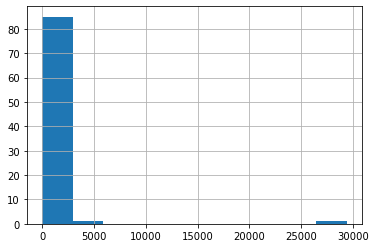

In [51]:
female_rev_cleaned['n_votes'].value_counts().hist()

In [72]:
# the code in these sections have been overwritten to show the relationship between number of votes and other i.vs
final_g = combined_data_r[['rating', 'n_comments', 'gender', 'review_length','sentiment_score']]
final_w = combined_data_r[['rating', 'n_comments', 'review_length','sentiment_score']]
pred = combined_data_r['n_votes']

In [73]:
final_g.head()

,rating,n_comments,gender,review_length,sentiment_score
140548,1,0,0,139,-0.046579
1394505,1,5,0,190,0.325000
9680,1,0,0,238,0.009271
315699,1,2,0,363,0.066667
556211,1,0,0,75,0.051923


In [74]:
import statsmodels.api as sm
model_g = sm.OLS(pred, sm.add_constant(final_g)).fit()
model_w = sm.OLS(pred, sm.add_constant(final_w)).fit()

/nethome/vkumar364/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [75]:
model_g.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                n_votes   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     3362.
Date:                Thu, 28 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:22:08   Log-Likelihood:                -62300.
No. Observations:               18064   AIC:                         1.246e+05
Df Residuals:                   18058   BIC:                         1.247e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.1152      0.160      6.972      0.000       0.802       1.429
rating              0.1473      0.042      3.509      0.000       0.065       0.230
n_comments          2.1723      0.017    126.367      0.000       2.139       2.206
gender             -0.4467      0.114     -3.935      0.000      -0.669      -0.224
review_length       0.0047      0.000     10.109      0.000       0.004       0.006
sentiment_score    -0.1458      0.323     -0.452      0.652      -0.779       0.487
==============================================================================
Omnibus:                    31731.005   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        307844226.286
Skew:                          11.591   Prob(JB):                         0.00
Kurtosis:                     642.114   Cond. No.                     1.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [76]:
sm.stats.anova_lm(model_w, model_g)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,18059.0,1.047971e+06,0.0,NaN,NaN,NaN
1,18058.0,1.047074e+06,1.0,897.781286,15.483279,0.000084
